In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
RECORD         = slice( 0,  6)
ATOM_NUMBER    = slice( 6, 11)
ATOM_NAME      = slice(11, 16)
ALT_LOC_IND    =       16
RESIDUE_NAME   = slice(17, 20)
CHAIN_ID       =       21
RESIDUE_NUMBER = slice(22, 26)
COORDINATES    = slice(31, 54)

In [48]:
def get_bfactors(pdb_file):
    
    b_factors = {}

    current_residue = None

    n_atoms_in_res = 0
    running_sum = 0.0
    
    with open(pdb_file, 'r') as f:
        
        for l in f:
            if l.startswith('ATOM') or l.startswith('HETATM'):

                num = int( l[RESIDUE_NUMBER] )
                chain_id = l[CHAIN_ID]
                bfc = float( l[60:66] )

                n_atoms_in_res += 1
                running_sum += bfc

                if num != current_residue:
                    if num == 7 or num == 8:
                        print(num, chain_id)

                    mean_b = running_sum / n_atoms_in_res

                    if chain_id in b_factors.keys():
                        b_factors[chain_id].append((num, mean_b))
                    else:
                        b_factors[chain_id] = [(num, mean_b)]

                    n_atoms_in_res = 0
                    running_sum = 0.0
                    current_residue = num
                    
    return b_factors


def get_map_cc(map_cc_log):
    
    head = 'RESIDUE           CC       ALL     MAIN     SIDE'
    READ = False
    
    ccs = []
    
    with open(map_cc_log, 'r') as f:
        
        for l in f:
            if l.find(head) >= 0:
                READ = True
                continue
        
            if READ:
                
                # check for end of table
                if len(l.strip()) == 0:
                    READ = False
                else:
                
                    # ASP    233   A   0.92      2.3      2.8      1.8   [WEAK DENSITY ...]
                    sp = l.strip().split()
                        
                    res   = sp[0]
                    num   = int(sp[1])
                    chain = sp[2]
                    cc    = float(sp[3])
                    
                    if chain == 'A' and res != 'HOH' and num < 520 and num > 200:
                        ccs.append( (num, cc) )
                    
    
    return np.array(ccs)


In [49]:
superdark_path = '/Users/tjlane/Desktop/pl-refinements/depositions/1_superdark/superdark_deposit.pdb'

In [50]:
sd_bfactors = get_bfactors(superdark_path)

7 A
8 A
7 B
8 B
7 C
7 D
8 D
7 E
7 F
8 F
7 W
8 W


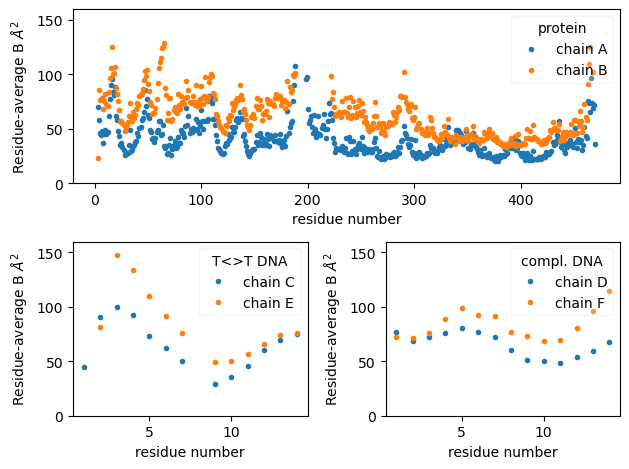

In [55]:
plt.figure()

plt.subplot(2, 1, 1)

a_bfs = np.array(sd_bfactors['A'])
b_bfs = np.array(sd_bfactors['B'])
plt.plot(a_bfs[:,0], a_bfs[:,1], '.')
plt.plot(b_bfs[:,0], b_bfs[:,1], '.')
plt.legend(['chain A', 'chain B'], loc=1, fancybox=True, framealpha=0.2, title="protein")

plt.xlabel('residue number')
plt.ylabel('Residue-average B $\AA^2$')
plt.ylim([0,160])


plt.subplot(2, 2, 3)

c_bfs = np.array(sd_bfactors['C'])
e_bfs = np.array(sd_bfactors['E'])
plt.plot(c_bfs[:,0], c_bfs[:,1], '.')
plt.plot(e_bfs[:,0], e_bfs[:,1], '.')
plt.legend(['chain C', 'chain E'], loc=1, fancybox=True, framealpha=0.2, title="T<>T DNA")

plt.xlabel('residue number')
plt.ylabel('Residue-average B $\AA^2$')
plt.ylim([0,160])


plt.subplot(2, 2, 4)

d_bfs = np.array(sd_bfactors['D'])
f_bfs = np.array(sd_bfactors['F'])
plt.plot(d_bfs[:,0], d_bfs[:,1], '.')
plt.plot(f_bfs[:,0], f_bfs[:,1], '.')
plt.legend(['chain D', 'chain F'], loc=1, fancybox=True, framealpha=0.2, title="compl. DNA")

plt.xlabel('residue number')
plt.ylabel('Residue-average B $\AA^2$')
plt.ylim([0,160])

plt.tight_layout()
plt.savefig("/Users/tjlane/Desktop/PL-workshop/signals_chain_A_vs_B/bfactors.pdf")
plt.show()